# Basic feature interrelation analysis using the 'fip3' library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import csv

from fip import profiles

In [2]:
DATASET_NAME = 'ChEMBL28'
DATASET_LINK = '../../scratch/data/chembl_28/chembl_compounds_activities_features.csv'
OUTPUT_FIGURE_PATH = '../../scratch/data/chembl_28/pix'

FEATURES_NAME = 'ECFP1-like substructures'
COOCCURRENCE_MX_LINK = '../../scratch/data/chembl_28/ec_fragments_r1_coomx.csv'
COOCCURRENCE_MX_VECTOR_COUNT = 2066376

MINIMAL_COOCCURRENCE_CUTOFF = 100  # How many co-occurrences are needed to start tracking the relation

HYBRID_FEATURES_NAME = FEATURES_NAME + " and ChEMBL activities"
HYBRID_COOCCURRENCE_MX_LINK = '../../scratch/data/chembl_28/ec_fragments_r1_activities_coomx.csv'
HYBRID_COOCCURRENCE_MX_VECTOR_COUNT = COOCCURRENCE_MX_VECTOR_COUNT

REFERENCE_DATASET_NAME = 'ZINC_DM'
REFERENCE_DATASET_LINK = '../../scratch/data/zinc_dark_matter/zinc_dm_in_stock_features.csv'
REFERENCE_COOCCURRENCE_MX_LINK = '../../scratch/data/zinc_dark_matter/zinc_dm_in_stock_ec_fragments_r1_coomx.csv'
REFERENCE_COOCCURRENCE_MX_VECTOR_COUNT = 5063486

# Derived from primary dataset, adjusted for size difference
REFERENCE_MINIMAL_COOCCURRENCE_CUTOFF = int(MINIMAL_COOCCURRENCE_CUTOFF * 
                                            (REFERENCE_COOCCURRENCE_MX_VECTOR_COUNT /
                                             COOCCURRENCE_MX_VECTOR_COUNT))

TRACKED_FEATURES = ['Cannabinoid CB1 receptor']

## Loading an interrelation profile
From interrelation files already preprocessed by scripts in fip3/scripts

In [3]:
p = profiles.CooccurrenceProfile.from_dataframe(
    pd.read_csv(COOCCURRENCE_MX_LINK), min_cutoff_value=MINIMAL_COOCCURRENCE_CUTOFF)
p

In [4]:
p.df

value
feature1   feature2                
C=O        C=O              1424230
           Cc(c)c            624876
           c-n(c)n            37580
           c=O               120205
           cC                273990
...                             ...
N=c([nH])n cc(c)Cl              141
CCS        cN=S                 149
cn(c)n     nc(-n)[nH]           565
CC(N)=O    cS(F)(F)(F)(F)F      106
CC(F)(F)F  nc(-n)[nH]           175

[47478 rows x 1 columns]

## General characterization of a co-occurrence profile

In [5]:
print(f"There are {len(p.distinct_features())} distinct {FEATURES_NAME} within {DATASET_NAME}.")

There are 897 distinct ECFP1-like substructures within ChEMBL28.


In [6]:
self_relations_values = p.select_self_relations()['value']
self_relations_values

feature1    feature2  
C=O         C=O           1424230
Cc(c)c      Cc(c)c         717878
c-n(c)n     c-n(c)n         55340
c=O         c=O            222434
cC          cC             408262
                           ...   
c-c(c)[o+]  c-c(c)[o+]        134
nc(n)[nH]   nc(n)[nH]         120
N=c(n)[nH]  N=c(n)[nH]        117
CC(C)=c     CC(C)=c           122
cn(C)[se]   cn(C)[se]         109
Name: value, Length: 897, dtype: int64

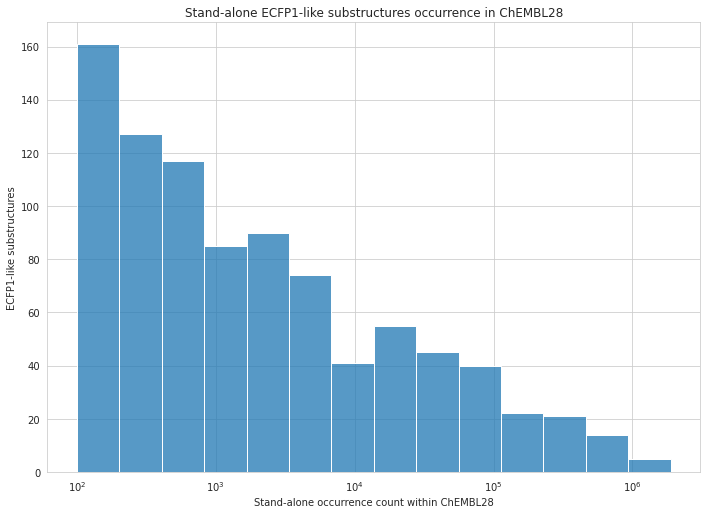

In [7]:
title = f"Stand-alone {FEATURES_NAME} occurrence in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(self_relations_values, log_scale=True)
ax.set(title=title, xlabel=f"Stand-alone occurrence count within {DATASET_NAME}", ylabel=f"{FEATURES_NAME}")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [8]:
cooccurrence_values = p.select_raw_interrelations()['value']
cooccurrence_values

feature1    feature2       
C=O         Cc(c)c             624876
            c-n(c)n             37580
            c=O                120205
            cC                 273990
            cC(c)=O             30748
                                ...  
N=c([nH])n  cc(c)Cl               141
CCS         cN=S                  149
cn(c)n      nc(-n)[nH]            565
CC(N)=O     cS(F)(F)(F)(F)F       106
CC(F)(F)F   nc(-n)[nH]            175
Name: value, Length: 46581, dtype: int64

In [9]:
print(f"There is in total {self_relations_values.sum()} feature stand-alone occurrences and \
{cooccurrence_values.sum()} feature co-occurrences for {FEATURES_NAME} within {DATASET_NAME}")

There is in total 33688980 feature stand-alone occurrences and 276946302 feature co-occurrences for ECFP1-like substructures within ChEMBL28


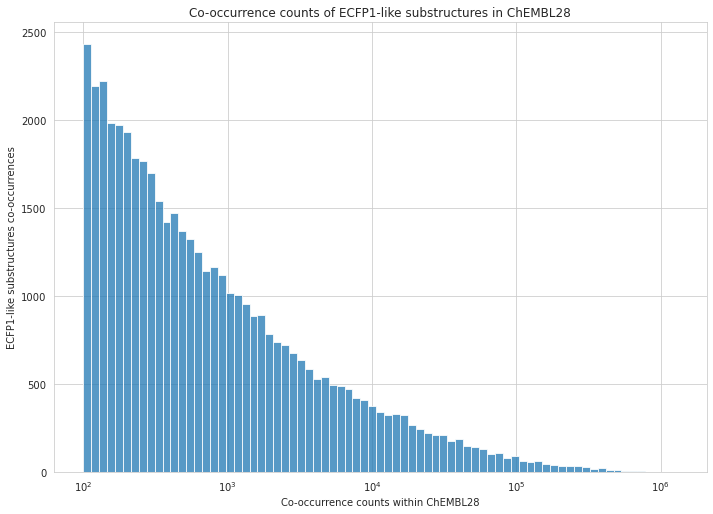

In [10]:
title = f"Co-occurrence counts of {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(cooccurrence_values, log_scale=True)
ax.set(title=title, xlabel=f"Co-occurrence counts within {DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} co-occurrences")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [11]:
print(f"The maximum theoretical number of different feature interrelations of the observed {FEATURES_NAME} \
within {DATASET_NAME} would be {int(p.num_max_interrelations())}, whereas the number of actual observed \
interrelations is only {p.num_raw_interrelations()}. Therefore, the interrelation matrix population ratio is \
approx. {p.num_raw_interrelations() / p.num_max_interrelations():.4f}.")

The maximum theoretical number of different feature interrelations of the observed ECFP1-like substructures within ChEMBL28 would be 401856, whereas the number of actual observed interrelations is only 46581. Therefore, the interrelation matrix population ratio is approx. 0.1159.


In [12]:
print(f"The mean co-occurrence value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean co-occurrence value for ECFP1-like substructures within ChEMBL28 is 5945.48, with the standard deviation of 30064.68. The mean stand-alone value is 37557.39, with the standard deviation of 139526.54.


## General characterization of pointwise mutual information profile

In [13]:
p = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    p, vector_count=COOCCURRENCE_MX_VECTOR_COUNT)
p

In [14]:
p.select_self_relations()['value']

feature1    feature2  
C=O         C=O           0.689240
Cc(c)c      Cc(c)c        0.347409
c-n(c)n     c-n(c)n       0.026781
c=O         c=O           0.107644
cC          cC            0.197574
                            ...   
c-c(c)[o+]  c-c(c)[o+]    0.000065
nc(n)[nH]   nc(n)[nH]     0.000058
N=c(n)[nH]  N=c(n)[nH]    0.000057
CC(C)=c     CC(C)=c       0.000059
cn(C)[se]   cn(C)[se]     0.000053
Name: value, Length: 897, dtype: float64

In [15]:
p.select_self_relations()['value'].min()

4.8393903142506496e-05

In [16]:
p.select_raw_interrelations()['value'].min()

4.8393903142506496e-05

In [17]:
p = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(p)

p

In [18]:
p.df

value
feature1   feature2                 
C=O        C=O              0.000000
           Cc(c)c           0.336752
           c-n(c)n         -0.021437
           c=O             -0.350960
           cC              -0.038451
...                              ...
N=c([nH])n cc(c)Cl          1.755450
CCS        cN=S             2.678707
cn(c)n     nc(-n)[nH]       4.683056
CC(N)=O    cS(F)(F)(F)(F)F  0.540092
CC(F)(F)F  nc(-n)[nH]       2.898813

[47478 rows x 1 columns]

In [19]:
pmi_values = p.select_raw_interrelations()['value']
pmi_values

feature1    feature2       
C=O         Cc(c)c             0.336752
            c-n(c)n           -0.021437
            c=O               -0.350960
            cC                -0.038451
            cC(c)=O            0.536921
                                 ...   
N=c([nH])n  cc(c)Cl            1.755450
CCS         cN=S               2.678707
cn(c)n      nc(-n)[nH]         4.683056
CC(N)=O     cS(F)(F)(F)(F)F    0.540092
CC(F)(F)F   nc(-n)[nH]         2.898813
Name: value, Length: 46581, dtype: float64

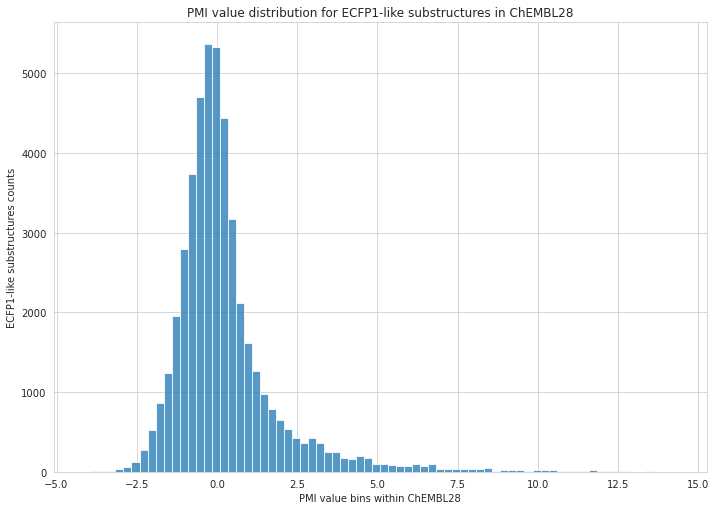

In [20]:
title = f"PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(pmi_values, binwidth=0.25)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [21]:
print(f"The mean PMI value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean PMI value for ECFP1-like substructures within ChEMBL28 is 0.25, with the standard deviation of 1.70. The mean stand-alone value is 0.00, with the standard deviation of 0.00.


In [22]:
major_pmi_values = p.select_major_interrelations(2)['value']
major_pmi_values

feature1     feature2  
c-n(c)n      cc(c)-n       4.251786
cc([nH])=O   nc([nH])=O    5.251617
C#N          cC#N          4.446057
cBr          cc(c)Br       4.726801
cC[n+]       c[n+](c)C     6.626132
                             ...   
c-c(c)o      nc(O)s        4.046249
CS(C)(=N)=O  cNc           4.148195
cN=S         cNc           4.374894
             ncn           3.816252
cn(c)n       nc(-n)[nH]    4.683056
Name: value, Length: 2089, dtype: float64

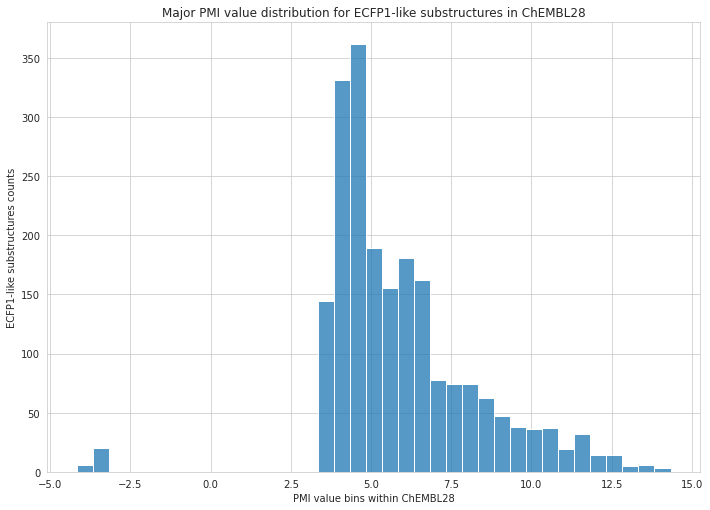

In [23]:
title = f"Major PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(major_pmi_values, binwidth=0.5)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [24]:
p.mean_raw_interrelation_value()

0.2533206760082737

## Graph visualization of PMI profile

In [25]:
graph = nx.Graph()
major_pmi_values = p.select_major_interrelations(2)

for feature_pair, value in major_pmi_values[major_pmi_values['value'] > 0].iterrows():
    graph.add_edge(feature_pair[0], feature_pair[1], weight=float(value))
graph

In [26]:
title = f"Kamada-Kawai graph visualization of major PMI interrelations for {FEATURES_NAME} in {DATASET_NAME}"
dims = (40, 40)
fig, ax = plt.subplots(figsize=dims)
nx.draw_kamada_kawai(graph, ax=ax, alpha=0.5, node_size=30, label=title)
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
plt.close()

In [27]:
title = f"Circular graph visualization of major PMI interrelations for {FEATURES_NAME} in {DATASET_NAME}"
dims = (40, 40)
fig, ax = plt.subplots(figsize=dims)
nx.draw_circular(graph, ax=ax, alpha=0.2, node_size=30)
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
plt.close()

In [28]:
title = f"A generic graph visualization of major PMI interrelations for {FEATURES_NAME} in {DATASET_NAME}"
dims = (40, 40)
fig, ax = plt.subplots(figsize=dims)
nx.draw_networkx(graph, ax=ax, alpha=0.1, node_size=30)
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
plt.close()

## General characterization of a hybrid co-occurrence profile

In [29]:
q = profiles.CooccurrenceProfile.from_dataframe(
    pd.read_csv(HYBRID_COOCCURRENCE_MX_LINK), min_cutoff_value=MINIMAL_COOCCURRENCE_CUTOFF)
q

In [30]:
q.df

value
feature1                                 feature2                                           
C=O                                      C=O                                         1424230
                                         Cc(c)c                                       624876
                                         c-n(c)n                                       37580
                                         c=O                                          120205
                                         cC                                           273990
...                                                                                      ...
Ubiquitin carboxyl-terminal hydrolase 25 cc(c)c                                          103
CC                                       Histone-lysine N-methyltransferase SUV39H2      107
Ubiquitin carboxyl-terminal hydrolase 28 cc(c)c                                          107
Sepiapterin reductase                    ccs                                             117
                                         csc                                             157

[83787 rows x 1 columns]

In [31]:
target_set = set()
with open(DATASET_LINK, 'r') as dataset:
    reader = csv.DictReader(dataset)
    for row in reader:
        activities = row['chembl_activities'].split(" | ")
        for activity in activities:
            activity = activity.strip()
            if activity:
                target_set.add(activity)
len(target_set)

5507

In [32]:
interrelation_type = ['feature-feature', 'feature-activity', 'activity-activity']
q.df['type'] = [interrelation_type[sum((x in target_set, y in target_set))]
                                   for x, y in zip(q.df.index.get_level_values(0),
                                                   q.df.index.get_level_values(1))]
q.df

value  \
feature1                                 feature2                                              
C=O                                      C=O                                         1424230   
                                         Cc(c)c                                       624876   
                                         c-n(c)n                                       37580   
                                         c=O                                          120205   
                                         cC                                           273990   
...                                                                                      ...   
Ubiquitin carboxyl-terminal hydrolase 25 cc(c)c                                          103   
CC                                       Histone-lysine N-methyltransferase SUV39H2      107   
Ubiquitin carboxyl-terminal hydrolase 28 cc(c)c                                          107   
Sepiapterin reductase                    ccs                                             117   
                                         csc                                             157   

                                                                                                 type  
feature1                                 feature2                                                      
C=O                                      C=O                                          feature-feature  
                                         Cc(c)c                                       feature-feature  
                                         c-n(c)n                                      feature-feature  
                                         c=O                                          feature-feature  
                                         cC                                           feature-feature  
...                                                                                               ...  
Ubiquitin carboxyl-terminal hydrolase 25 cc(c)c                                      feature-activity  
CC                                       Histone-lysine N-methyltransferase SUV39H2  feature-activity  
Ubiquitin carboxyl-terminal hydrolase 28 cc(c)c                                      feature-activity  
Sepiapterin reductase                    ccs                                         feature-activity  
                                         csc                                         feature-activity  

[83787 rows x 2 columns]

In [33]:
q.select_self_relations().loc[q.df.type=='activity-activity']

,,value,type
feature1,feature2,,
Aldehyde dehydrogenase 1A1,Aldehyde dehydrogenase 1A1,2117,activity-activity
Anandamide amidohydrolase,Anandamide amidohydrolase,2103,activity-activity
Bloom syndrome protein,Bloom syndrome protein,335,activity-activity
Adrenergic receptor alpha-1,Adrenergic receptor alpha-1,2793,activity-activity
Rattus norvegicus,Rattus norvegicus,2954,activity-activity
...,...,...,...
Phosphatidylcholine-sterol acyltransferase,Phosphatidylcholine-sterol acyltransferase,134,activity-activity
Serine protease HTRA1,Serine protease HTRA1,184,activity-activity
Amylin receptor AMY3; CALCR/RAMP3,Amylin receptor AMY3; CALCR/RAMP3,141,activity-activity


In [34]:
print(f"There are {len(q.distinct_features())} distinct {HYBRID_FEATURES_NAME} within {DATASET_NAME}, \
of which there are {len(q.select_self_relations().loc[q.df.type=='activity-activity'])} ChEMBL activities.")

There are 2046 distinct ECFP1-like substructures and ChEMBL activities within ChEMBL28, of which there are 1149 ChEMBL activities.


In [35]:
hybrid_self_relations_values = q.select_self_relations()['value']
hybrid_self_relations_values

feature1                                    feature2                                  
C=O                                         C=O                                           1424230
Cc(c)c                                      Cc(c)c                                         717878
c-n(c)n                                     c-n(c)n                                         55340
c=O                                         c=O                                            222434
cC                                          cC                                             408262
                                                                                           ...   
Phosphatidylcholine-sterol acyltransferase  Phosphatidylcholine-sterol acyltransferase        134
Serine protease HTRA1                       Serine protease HTRA1                             184
Amylin receptor AMY3; CALCR/RAMP3           Amylin receptor AMY3; CALCR/RAMP3                 141
Acetyl-coenzyme A synthetase, c

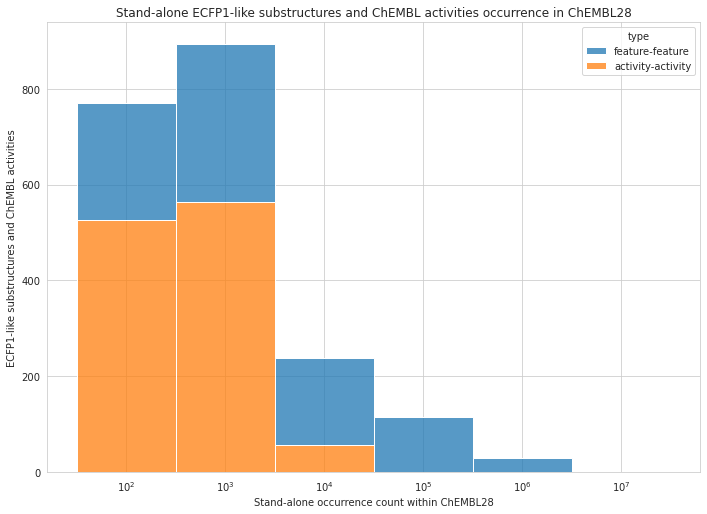

In [36]:
title = f"Stand-alone {HYBRID_FEATURES_NAME} occurrence in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(q.select_self_relations(), log_scale=True, discrete=True, 
             x="value", hue="type", multiple="stack")
ax.set(title=title, xlabel=f"Stand-alone occurrence count within {DATASET_NAME}",
       ylabel=f"{HYBRID_FEATURES_NAME}")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [37]:
hybrid_cooccurrence_values = q.select_raw_interrelations()['value']
hybrid_cooccurrence_values

feature1                                  feature2                                  
C=O                                       Cc(c)c                                        624876
                                          c-n(c)n                                        37580
                                          c=O                                           120205
                                          cC                                            273990
                                          cC(c)=O                                        30748
                                                                                         ...  
Ubiquitin carboxyl-terminal hydrolase 25  cc(c)c                                           103
CC                                        Histone-lysine N-methyltransferase SUV39H2       107
Ubiquitin carboxyl-terminal hydrolase 28  cc(c)c                                           107
Sepiapterin reductase                     ccs               

In [38]:
print(f"There is in total {self_relations_values.sum()} feature stand-alone occurrences and \
{hybrid_cooccurrence_values.sum()} feature co-occurrences for {HYBRID_FEATURES_NAME} within {DATASET_NAME}")

There is in total 33688980 feature stand-alone occurrences and 292457891 feature co-occurrences for ECFP1-like substructures and ChEMBL activities within ChEMBL28


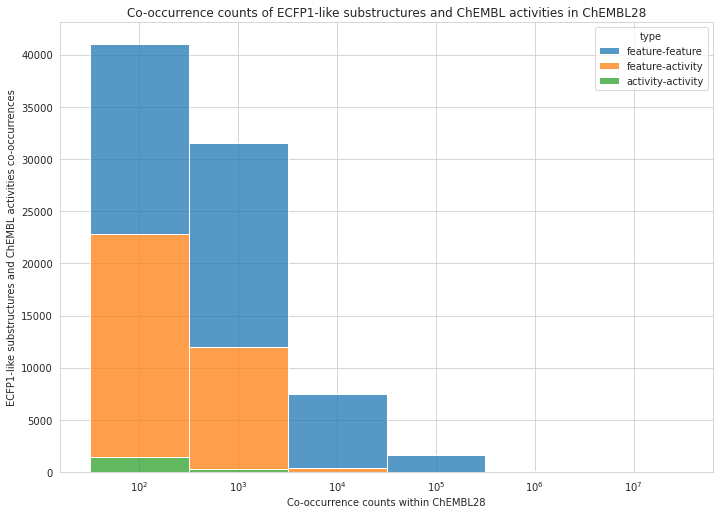

In [39]:
title = f"Co-occurrence counts of {HYBRID_FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(q.select_raw_interrelations(), log_scale=True, discrete=True,
             x="value", hue="type", multiple="stack")
ax.set(title=title, xlabel=f"Co-occurrence counts within {DATASET_NAME}",
       ylabel=f"{HYBRID_FEATURES_NAME} co-occurrences")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [40]:
q = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    q, vector_count=HYBRID_COOCCURRENCE_MX_VECTOR_COUNT)
q = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(q)

In [41]:
q.df

value  \
feature1                                 feature2                                               
C=O                                      C=O                                         0.000000   
                                         Cc(c)c                                      0.336752   
                                         c-n(c)n                                    -0.021437   
                                         c=O                                        -0.350960   
                                         cC                                         -0.038451   
...                                                                                       ...   
Ubiquitin carboxyl-terminal hydrolase 25 cc(c)c                                      2.006968   
CC                                       Histone-lysine N-methyltransferase SUV39H2 -0.856657   
Ubiquitin carboxyl-terminal hydrolase 28 cc(c)c                                      1.986646   
Sepiapterin reductase                    ccs                                         1.386228   
                                         csc                                         0.681754   

                                                                                         type  
feature1                                 feature2                                              
C=O                                      C=O                                                   
                                         Cc(c)c                                      0.336752  
                                         c-n(c)n                                    -0.021437  
                                         c=O                                         -0.35096  
                                         cC                                         -0.038451  
...                                                                                       ...  
Ubiquitin carboxyl-terminal hydrolase 25 cc(c)c                                      2.006968  
CC                                       Histone-lysine N-methyltransferase SUV39H2 -0.856657  
Ubiquitin carboxyl-terminal hydrolase 28 cc(c)c                                      1.986646  
Sepiapterin reductase                    ccs                                         1.386228  
                                         csc                                         0.681754  

[83787 rows x 2 columns]

In [42]:
# Fix the type write-through
q.df['type'] = [interrelation_type[sum((x in target_set, y in target_set))]
                                   for x, y in zip(q.df.index.get_level_values(0),
                                                   q.df.index.get_level_values(1))]
q.df

value  \
feature1                                 feature2                                               
C=O                                      C=O                                         0.000000   
                                         Cc(c)c                                      0.336752   
                                         c-n(c)n                                    -0.021437   
                                         c=O                                        -0.350960   
                                         cC                                         -0.038451   
...                                                                                       ...   
Ubiquitin carboxyl-terminal hydrolase 25 cc(c)c                                      2.006968   
CC                                       Histone-lysine N-methyltransferase SUV39H2 -0.856657   
Ubiquitin carboxyl-terminal hydrolase 28 cc(c)c                                      1.986646   
Sepiapterin reductase                    ccs                                         1.386228   
                                         csc                                         0.681754   

                                                                                                 type  
feature1                                 feature2                                                      
C=O                                      C=O                                          feature-feature  
                                         Cc(c)c                                       feature-feature  
                                         c-n(c)n                                      feature-feature  
                                         c=O                                          feature-feature  
                                         cC                                           feature-feature  
...                                                                                               ...  
Ubiquitin carboxyl-terminal hydrolase 25 cc(c)c                                      feature-activity  
CC                                       Histone-lysine N-methyltransferase SUV39H2  feature-activity  
Ubiquitin carboxyl-terminal hydrolase 28 cc(c)c                                      feature-activity  
Sepiapterin reductase                    ccs                                         feature-activity  
                                         csc                                         feature-activity  

[83787 rows x 2 columns]

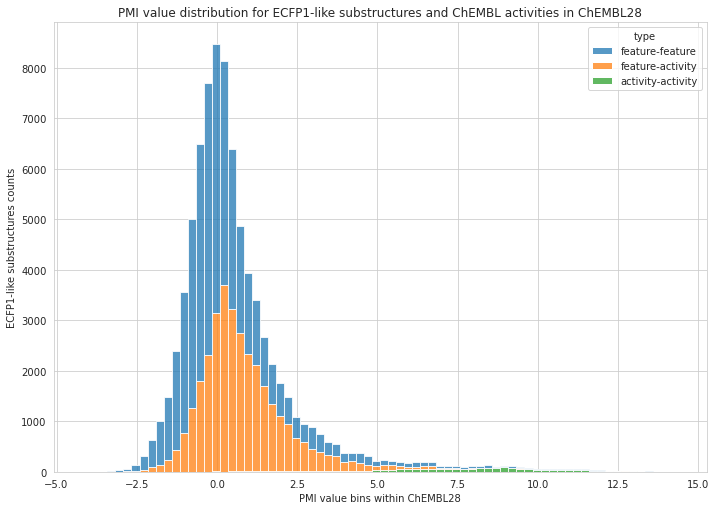

In [43]:
title = f"PMI value distribution for {HYBRID_FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(q.select_raw_interrelations(), binwidth=0.25, x="value", hue="type", multiple="stack")
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [44]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(q.df.loc[q.df.type == 'activity-activity'].sort_values('value', ascending=False)[:100])

,,value,type
feature1,feature2,,
Amylin receptor AMY3; CALCR/RAMP3,Calcitonin receptor,13.727699,activity-activity
Retinoid X receptor beta,Retinoid X receptor gamma,13.497888,activity-activity
Neuronal acetylcholine receptor; alpha2/beta4,Neuronal acetylcholine receptor; alpha4/beta4,13.478825,activity-activity
HCC78,NCI-H2228,13.188010,activity-activity
Integrin alpha-V/beta-6,Integrin alpha-V/beta-8,13.161746,activity-activity
Carbonic anhydrase III,Carbonic anhydrase VI,12.982967,activity-activity
HCC78,KARPAS-299,12.969704,activity-activity
Retinoic acid receptor alpha,Retinoic acid receptor gamma,12.905814,activity-activity
Retinoic acid receptor beta,Retinoic acid receptor gamma,12.880300,activity-activity


In [45]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(q.df.loc[q.df.type == 'feature-activity'].sort_values('value', ascending=False)[:100])

value  \
feature1                                           feature2                                                        
Acetyl-coenzyme A transporter 1                    co[nH]                                              12.598439   
                                                   c[nH]o                                              12.593895   
Fructose-1,6-bisphosphatase                        cc(o)P                                              11.714558   
MAP kinase signal-integrating kinase 2             cN=S                                                11.108072   
CS(C)(=N)=O                                        MAP kinase signal-integrating kinase 2              10.685063   
Sepiapterin reductase                              nc(-n)[nH]                                          10.599569   
Beta-lactamase                                     NOS                                                 10.315663   
Fructose-1,6-bisphosphatase                        cP(=O)(O)O                                          10.305028   
Sodium/calcium exchanger 1                         nc(O)s                                              10.255010   
COn                                                Prolactin-releasing peptide receptor                10.253007   
CC(c)S                                             Hepatic lipase                                      10.213547   
ATP-sensitive inward rectifier potassium channel 1 [C-]#[N+]c                                          10.051620   
Acetyl-coenzyme A synthetase, cytoplasmic          cC(c)(c)O                                           10.010907   
Bifunctional protein NCOAT                         CC(O)S                                               9.774591   
Histone acetyltransferase KAT6A                    NNS                                                  9.745052   
ATP-sensitive inward rectifier potassium channel 1 [C-]#[N+]                                            9.627510   
OC(F)(F)Cl                                         Tyrosine-protein kinase ABL                          9.591581   
Proteinase activated receptor 4                    nc(O)s                                               9.575926   
CC(O)(F)F                                          Cholesteryl ester transfer protein                   9.553232   
NS(=O)(=O)O                                        Ubiquitin-like modifier-activating enzyme ATG7       9.414998   
POP                                                Purinergic receptor P2Y2                             9.409941   
NS(=O)(=O)O                                        Receptor-type tyrosine-protein phosphatase beta      9.340998   
N=c([nH])n                                         P2X purinoceptor 3                                   9.327162   
N#CN                                               Ubiquitin carboxyl-terminal hydrolase 30             9.314323   
Acetyl-coenzyme A transporter 1                    nc(=O)o                                              9.180560   
CC(c)S                                             Endothelial lipase                                   9.130339   
Pyruvate dehydrogenase kinase isoform 2            cC(c)(C)O                                            9.084487   
Fatty acid synthase                                cC(C)(C)F                                            9.072114   
Prolactin-releasing peptide receptor               cn(c)O                                               8.946605   
NS(=O)(=O)O                                        Steryl-sulfatase                                     8.892667   
Phosphatidylcholine-sterol acyltransferase         cc(N)[nH]                                            8.872763   
Serine/threonine-protein kinase PLK1               cc(-n)s                                              8.771033   
CC(=N)n                                            Metabotropic glutamate receptor 5                    8.748254   
Inosine-5'-monophosphate dehydrogenase 2       

In [46]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(q.df.loc[q.df.type == 'feature-feature'].sort_values('value', ascending=False)[:100])

,,value,type
feature1,feature2,,
BP,BP(=O)(O)O,14.237204,feature-feature
O[Cl+3],[O-][Cl+3]([O-])([O-])O,13.978671,feature-feature
C=[Se],NC(N)=[Se],13.839120,feature-feature
O=[As],O[As],13.797105,feature-feature
[n+]no,cc([O-])o,13.731205,feature-feature
O[As],cc(c)[As],13.527846,feature-feature
O=[As],cc(c)[As],13.524017,feature-feature
F[P-],F[P-](F)(F)(F)(F)F,13.439513,feature-feature
c[nH]s,cs[nH],13.401243,feature-feature


## Investigating specific interrelations

In [47]:
# take only interrelations of pmi > 2, i.e. four times more occurring that what the marginal suggest 
q.df = q.df[q.df.value > 2]
q.df

value  \
feature1                                   feature2                                               
c-n(c)n                                    cc(c)-n                                     4.251786   
                                           cnn                                         2.840851   
c=O                                        cc([nH])=O                                  3.215654   
                                           nc([nH])=O                                  3.215654   
cCl                                        cc(c)Cl                                     2.642884   
...                                                                                         ...   
Acetyl-coenzyme A synthetase, cytoplasmic  cc(c)n                                      2.456507   
                                           cn(c)C                                      2.997662   
A549                                       Histone-lysine N-methyltransferase SUV39H2  7.198071   
Histone-lysine N-methyltransferase SUV39H2 cN(C)C                                      2.759151   
Ubiquitin carboxyl-terminal hydrolase 25   cc(c)c                                      2.006968   

                                                                                                    type  
feature1                                   feature2                                                       
c-n(c)n                                    cc(c)-n                                       feature-feature  
                                           cnn                                           feature-feature  
c=O                                        cc([nH])=O                                    feature-feature  
                                           nc([nH])=O                                    feature-feature  
cCl                                        cc(c)Cl                                       feature-feature  
...                                                                                                  ...  
Acetyl-coenzyme A synthetase, cytoplasmic  cc(c)n                                       feature-activity  
                                           cn(c)C                                       feature-activity  
A549                                       Histone-lysine N-methyltransferase SUV39H2  activity-activity  
Histone-lysine N-methyltransferase SUV39H2 cN(C)C                                       feature-activity  
Ubiquitin carboxyl-terminal hydrolase 25   cc(c)c                                       feature-activity  

[11696 rows x 2 columns]

[Text(0.5, 1.0, 'Filtered PMI value distribution for ECFP1-like substructures and ChEMBL activities in ChEMBL28'),
 Text(0.5, 0, 'PMI value bins within ChEMBL28'),
 Text(0, 0.5, 'ECFP1-like substructures counts')]

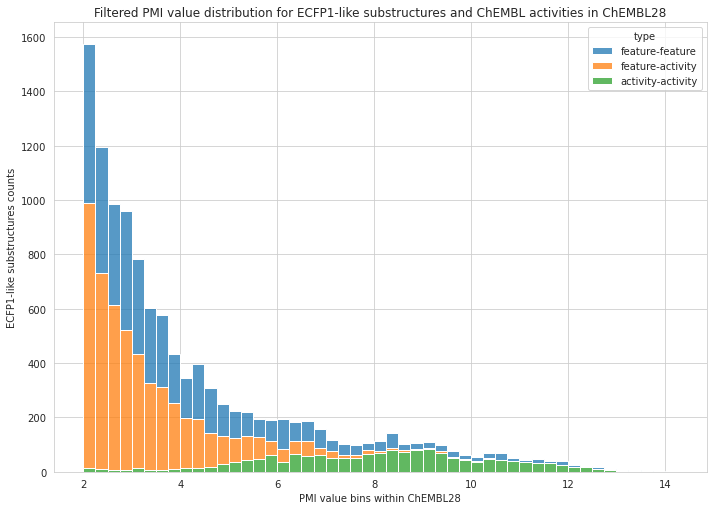

In [48]:
title = f"Filtered PMI value distribution for {HYBRID_FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(q.select_raw_interrelations(), binwidth=0.25, x="value", hue="type", multiple="stack")
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
#plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [49]:
q.select_raw_interrelations_involving(TRACKED_FEATURES)

value               type
feature1                 feature2                                             
Cannabinoid CB1 receptor Cannabinoid CB2 receptor  7.277540  activity-activity
                         Cc(c)n                    2.093343   feature-activity
                         c-n(c)n                   3.025028   feature-activity
                         cc(c)-n                   2.754962   feature-activity
                         c-n(c)c                   2.175894   feature-activity
                         cc(-n)n                   6.209718   feature-activity
                         cC(c)c                    4.461933   feature-activity
CN(C)N                   Cannabinoid CB1 receptor  3.168825   feature-activity
C=NS                     Cannabinoid CB1 receptor  3.530717   feature-activity

In [50]:
tf = q.select_raw_interrelations_involving(TRACKED_FEATURES, 1)
tf

value              type
feature1                       feature2                            
c-n(c)n                        cc(c)-n   4.251786   feature-feature
                               cnn       2.840851   feature-feature
cc(c)-n                        cnn       2.187233   feature-feature
c-n(c)c                        cc(c)-n   4.311483   feature-feature
c-n(c)n                        nnn       3.265997   feature-feature
...                                           ...               ...
G-protein coupled receptor 81  cc(c)-n   4.163447  feature-activity
Lysine-specific demethylase 4C c-n(c)n   3.788454  feature-activity
Lysine-specific demethylase 5B c-n(c)n   4.704345  feature-activity
Bcl-2-like protein 1           Cc(c)n    2.529039  feature-activity
Sepiapterin reductase          c-n(c)n   5.130855  feature-activity

[314 rows x 2 columns]

In [51]:
graph = nx.Graph()
for feature_pair, row in tf.iterrows():
    graph.add_edge(feature_pair[0], feature_pair[1], weight=float(row['value']))
graph

In [52]:
nodecolors = {'feature': '#0000ff', 'target': '#00ff00', 'highlight': '#ff0000'}
node2color = {node: nodecolors['target'] if node in target_set
              else nodecolors['feature'] for node in graph.nodes()}
for tracked in TRACKED_FEATURES:
    node2color[tracked] = nodecolors['highlight']

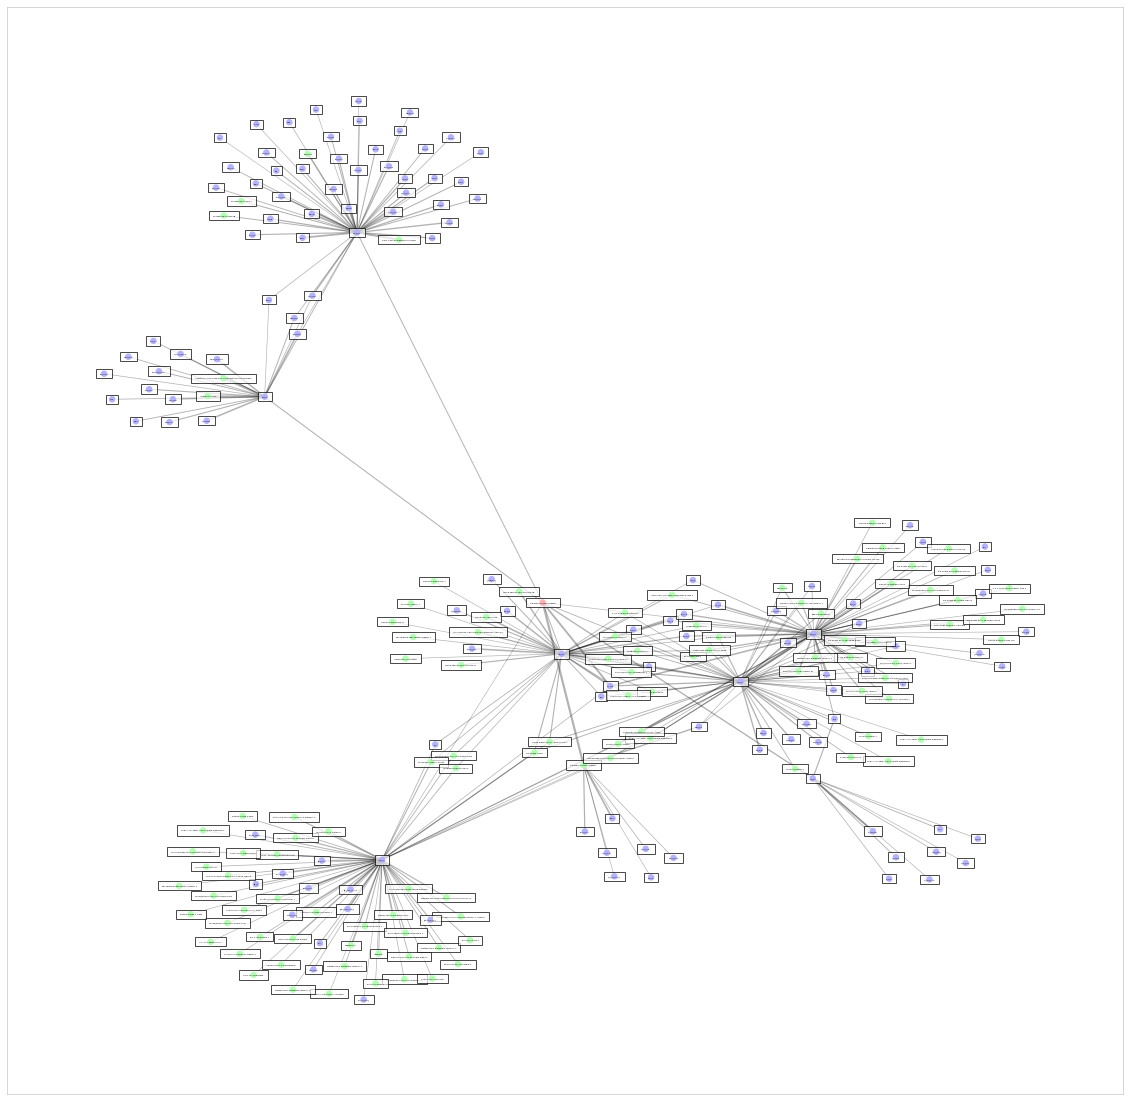

In [53]:
title = f"A PMI interrelation visualization for {TRACKED_FEATURES} using {FEATURES_NAME} in {DATASET_NAME}"
dims = (20, 20)
fig, ax = plt.subplots(figsize=dims)
ax.grid(False)
pos = nx.spring_layout(graph, scale=2)
edgewidth_coefficient = 0.3
edgewidths = [graph.edges[a, b]['weight']*edgewidth_coefficient for a, b in graph.edges()]
nx.draw_networkx_nodes(graph, ax=ax, node_size=30, pos=pos,
                       node_color = [node2color[node] for node in graph.nodes()]) 
nx.draw_networkx_edges(graph, ax=ax, alpha=0.3, width=edgewidths, pos=pos)
nx.draw_networkx_labels(graph, pos, font_size=2, bbox={"ec": "k", "fc": "white", "alpha": 0.7})
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")

## Characterization of reference interrelation profile

In [54]:
r = profiles.CooccurrenceProfile.from_dataframe(
    pd.read_csv(REFERENCE_COOCCURRENCE_MX_LINK), min_cutoff_value=REFERENCE_MINIMAL_COOCCURRENCE_CUTOFF)
r

In [55]:
r.df

value
feature1 feature2         
CCN      CCN       2528337
         CCO        826314
         COC        738421
         Cn         141362
         Cn(n)n       2581
...                    ...
CC(c)n   cSc          1530
         cc(o)S        768
C=C(C)N  cc(-n)s       266
CN=c     cc(-n)s       294
N=c(n)s  cc(-n)s       295

[38277 rows x 1 columns]

In [56]:
print(f"There are {len(r.distinct_features())} distinct {FEATURES_NAME} within {REFERENCE_DATASET_NAME}.")

There are 686 distinct ECFP1-like substructures within ZINC_DM.


In [57]:
self_relations_values = r.select_self_relations()['value']
self_relations_values

feature1    feature2  
CCN         CCN           2528337
CCO         CCO           1502583
COC         COC           1299313
Cn          Cn             269794
Cn(n)n      Cn(n)n           7355
                           ...   
cC(c)(c)c   cC(c)(c)c         464
cP(C)(=N)O  cP(C)(=N)O        260
CC(=c)S     CC(=c)S           444
C=[N+](C)N  C=[N+](C)N       1443
CP(=N)(N)N  CP(=N)(N)N        297
Name: value, Length: 686, dtype: int64

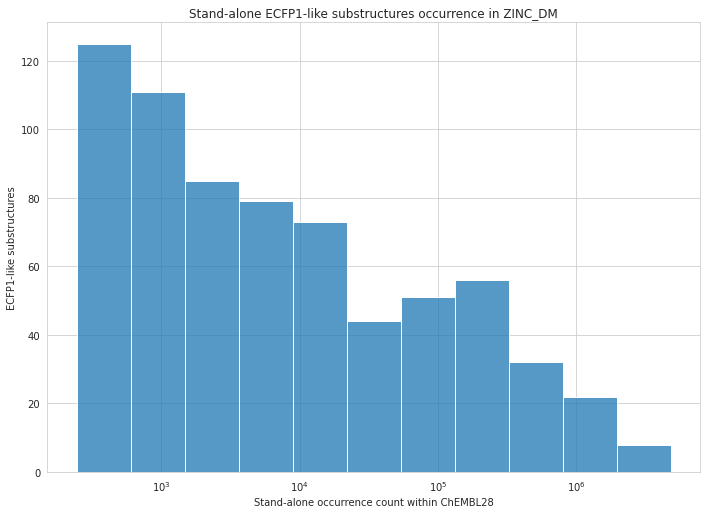

In [58]:
title = f"Stand-alone {FEATURES_NAME} occurrence in {REFERENCE_DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(self_relations_values, log_scale=True)
ax.set(title=title, xlabel=f"Stand-alone occurrence count within {DATASET_NAME}", ylabel=f"{FEATURES_NAME}")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [59]:
cooccurrence_values = r.select_raw_interrelations()['value']
cooccurrence_values

feature1  feature2
CCN       CCO         826314
          COC         738421
          Cn          141362
          Cn(n)n        2581
          c-c(n)n      56956
                       ...  
CC(c)n    cSc           1530
          cc(o)S         768
C=C(C)N   cc(-n)s        266
CN=c      cc(-n)s        294
N=c(n)s   cc(-n)s        295
Name: value, Length: 37591, dtype: int64

In [60]:
print(f"There is in total {self_relations_values.sum()} feature stand-alone occurrences and \
{cooccurrence_values.sum()} feature co-occurrences for {FEATURES_NAME} within {REFERENCE_DATASET_NAME}")

There is in total 89934594 feature stand-alone occurrences and 778345582 feature co-occurrences for ECFP1-like substructures within ZINC_DM


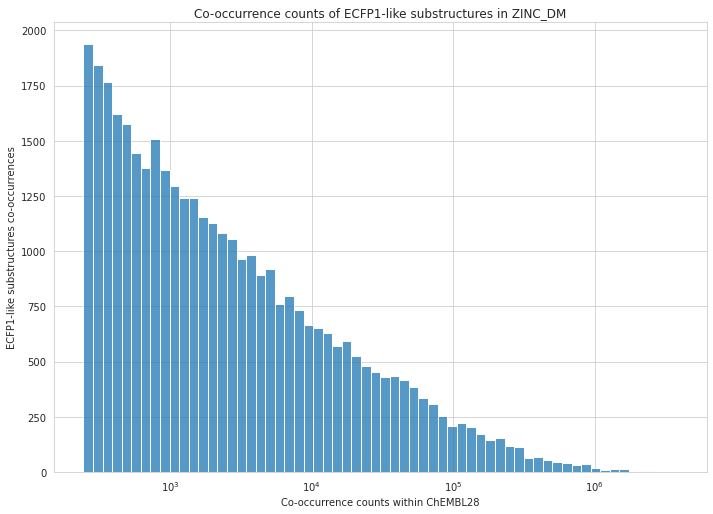

In [61]:
title = f"Co-occurrence counts of {FEATURES_NAME} in {REFERENCE_DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(cooccurrence_values, log_scale=True)
ax.set(title=title, xlabel=f"Co-occurrence counts within {DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} co-occurrences")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [62]:
print(f"The maximum theoretical number of different feature interrelations of the observed {FEATURES_NAME} \
within {REFERENCE_DATASET_NAME} would be {int(r.num_max_interrelations())}, whereas the number of actual observed \
interrelations is only {r.num_raw_interrelations()}. Therefore, the interrelation matrix population ratio is \
approx. {r.num_raw_interrelations() / r.num_max_interrelations():.4f}.")

The maximum theoretical number of different feature interrelations of the observed ECFP1-like substructures within ZINC_DM would be 234955, whereas the number of actual observed interrelations is only 37591. Therefore, the interrelation matrix population ratio is approx. 0.1600.


In [63]:
print(f"The mean co-occurrence value for {FEATURES_NAME} within {REFERENCE_DATASET_NAME} \
is {r.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {r.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {r.mean_self_relation_value():.2f}, \
with the standard deviation of {r.standard_self_relation_deviation():.2f}.")

The mean co-occurrence value for ECFP1-like substructures within ZINC_DM is 20705.64, with the standard deviation of 94155.05. The mean stand-alone value is 131099.99, with the standard deviation of 422036.49.


## General characterization of reference pointwise mutual information profile

In [64]:
r = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    r, vector_count=REFERENCE_COOCCURRENCE_MX_VECTOR_COUNT)
r.df

value
feature1 feature2          
CCN      CCN       0.499327
         CCO       0.163191
         COC       0.145833
         Cn        0.027918
         Cn(n)n    0.000510
...                     ...
CC(c)n   cSc       0.000302
         cc(o)S    0.000152
C=C(C)N  cc(-n)s   0.000053
CN=c     cc(-n)s   0.000058
N=c(n)s  cc(-n)s   0.000058

[38277 rows x 1 columns]

In [65]:
r = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(r)
r.df

value
feature1 feature2          
CCN      CCN       0.000000
         CCO       0.139260
         COC       0.186709
         Cn        0.069478
         Cn(n)n   -0.508853
...                     ...
CC(c)n   cSc       2.488432
         cc(o)S    3.156343
C=C(C)N  cc(-n)s   0.589271
CN=c     cc(-n)s   1.948431
N=c(n)s  cc(-n)s   1.921099

[38277 rows x 1 columns]

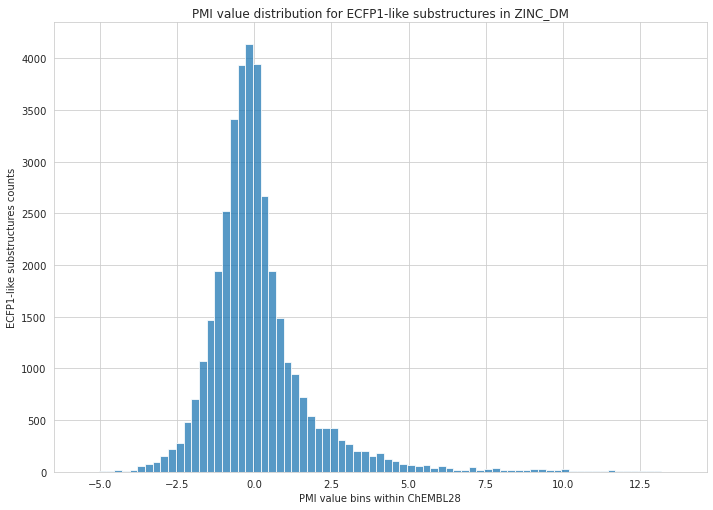

In [66]:
title = f"PMI value distribution for {FEATURES_NAME} in {REFERENCE_DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(r.select_raw_interrelations()['value'], binwidth=0.25)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

## Graph visualization of reference PMI profile

In [67]:
graph = nx.Graph()
major_pmi_values = r.select_major_interrelations(2)

for feature_pair, value in major_pmi_values[major_pmi_values['value'] > 0].iterrows():
    graph.add_edge(feature_pair[0], feature_pair[1], weight=float(value))
graph

In [68]:
title = f"Kamada-Kawai graph visualization of major PMI interrelations for {FEATURES_NAME} \
in {REFERENCE_DATASET_NAME}"
dims = (40, 40)
fig, ax = plt.subplots(figsize=dims)
nx.draw_kamada_kawai(graph, ax=ax, alpha=0.5, node_size=30, label=title)
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
plt.close()

In [69]:
title = f"Circular graph visualization of major PMI interrelations for {FEATURES_NAME} in \
{REFERENCE_DATASET_NAME}"
dims = (40, 40)
fig, ax = plt.subplots(figsize=dims)
nx.draw_circular(graph, ax=ax, alpha=0.2, node_size=30)
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
plt.close()

In [70]:
title = f"A generic graph visualization of major PMI interrelations for {FEATURES_NAME} in \
{REFERENCE_DATASET_NAME}"
dims = (40, 40)
fig, ax = plt.subplots(figsize=dims)
nx.draw_networkx(graph, ax=ax, alpha=0.1, node_size=30)
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
plt.close()

## Comparing profiles using Pointwise KL Divergence

In [71]:
p = profiles.CooccurrenceProfile.from_dataframe(
    pd.read_csv(COOCCURRENCE_MX_LINK), min_cutoff_value=MINIMAL_COOCCURRENCE_CUTOFF)
p = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    p, vector_count=COOCCURRENCE_MX_VECTOR_COUNT)
p.df

value
feature1   feature2                 
C=O        C=O              0.689240
           Cc(c)c           0.302402
           c-n(c)n          0.018186
           c=O              0.058172
           cC               0.132594
...                              ...
N=c([nH])n cc(c)Cl          0.000068
CCS        cN=S             0.000072
cn(c)n     nc(-n)[nH]       0.000273
CC(N)=O    cS(F)(F)(F)(F)F  0.000051
CC(F)(F)F  nc(-n)[nH]       0.000085

[47478 rows x 1 columns]

In [72]:
r = profiles.CooccurrenceProfile.from_dataframe(
    pd.read_csv(REFERENCE_COOCCURRENCE_MX_LINK), min_cutoff_value=REFERENCE_MINIMAL_COOCCURRENCE_CUTOFF)
r = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    r, vector_count=REFERENCE_COOCCURRENCE_MX_VECTOR_COUNT)
r.df

value
feature1 feature2          
CCN      CCN       0.499327
         CCO       0.163191
         COC       0.145833
         Cn        0.027918
         Cn(n)n    0.000510
...                     ...
CC(c)n   cSc       0.000302
         cc(o)S    0.000152
C=C(C)N  cc(-n)s   0.000053
CN=c     cc(-n)s   0.000058
N=c(n)s  cc(-n)s   0.000058

[38277 rows x 1 columns]

In [73]:
k = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(p, r)
k.df

value
feature1 feature2          
C=O      C=O      -0.195532
         Cc(c)c   -0.042577
         c-n(c)n  -0.604856
         c=O      -0.613486
         cC       -1.073105
...                     ...
CC(c)n   cSc      -9.286288
         cc(o)S   -8.291935
C=C(C)N  cc(-n)s  -6.762255
CN=c     cc(-n)s  -6.906645
N=c(n)s  cc(-n)s  -6.911544

[54003 rows x 1 columns]

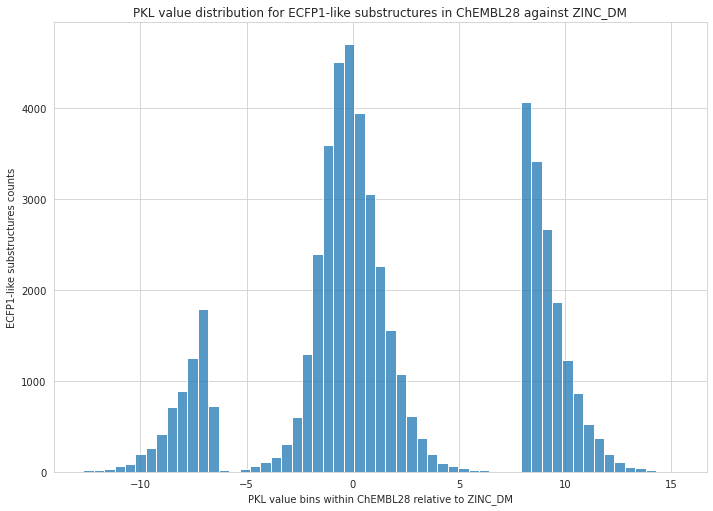

In [74]:
title = f"PKL value distribution for {FEATURES_NAME} in {DATASET_NAME} against {REFERENCE_DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(k.select_raw_interrelations()['value'])
ax.set(title=title, xlabel=f"PKL value bins within {DATASET_NAME} relative to {REFERENCE_DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [75]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(k.df.sort_values('value', ascending=False)[:100])

,,value
feature1,feature2,
CNO,NO,15.258272
C=N,cC(=N)N,14.596952
CO,OP,14.596381
O=P,cn(c)C,14.561717
CC(n)O,cN,14.511743
N=C(N)N,cc[nH],14.456521
CCS,N=C(N)N,14.437846
N=C(N)N,cc(c)[nH],14.234260
COC,OP,14.195969


In [76]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(k.df.sort_values('value', ascending=True)[:100])

value
feature1      feature2                
C=c(c)s       cBr           -12.684700
              cc(c)Br       -12.664800
CN=c          cBr           -12.654975
CC(C)=C       cI            -12.630021
CN=c          cc(c)Br       -12.628163
CC(C)=C       cc(c)I        -12.605385
cBr           cC=c          -12.604723
cC=c          cc(c)Br       -12.583681
c=NC          c[nH]c        -12.456109
CC(c)N        cC(=C)O       -12.448966
C=c(c)s       cCO           -12.384031
              cC(C)n        -12.381827
N=c(n)s       cC(C)n        -12.378956
cC=c          cCO           -12.377850
N=c(n)s       cCO           -12.338491
N=c([nH])[nH] c[nH]c        -12.319035
              N=c([nH])[nH] -12.319035
              ccc           -12.317190
CN=c          cCO           -12.299546
              cC(C)n        -12.268141
c=NC          cc(=N)[nH]    -12.262520
cC(C)n        cC=c          -12.249521
N=c([nH])[nH] c=NC          -12.196820
              cc(=N)[nH]    -12.193933
CC(c)n        cCO           -12.015312
cc(=N)[nH]    cc(c)N        -11.994108
C=Nn          CC(=O)O       -11.984260
cN=c          cc(=N)[nH]    -11.960377
cc(c)o        cn(c)N        -11.926141
C=Nn          cc(c)o        -11.904036
cC(=C)O       cC(C)N        -11.864319
c-c(c)[nH]    c=NC          -11.846364
N=c([nH])[nH] cc(c)N        -11.837543
              cN=c          -11.787124
C=c(c)s       CC(C)O        -11.770536
c=NC          cN=c          -11.770030
C=Nn          CC(C)O        -11.766486
CS(C)=O       CS(C)=O       -11.748289
              O=S           -11.748289
N=c([nH])[nH] c-c(c)[nH]    -11.742803
c-c(c)[nH]    cc(=N)[nH]    -11.742803
CC(C)O        cC=c          -11.684074
c-c(c)c       cc(=N)[nH]    -11.635121
CS(C)=O       ccc           -11.621918
CC(=N)O       CC(C)=C       -11.563204
C=C(C)N       cI            -11.537884
              cc(c)I        -11.513119
CC(C)N        cc(=N)[nH]    -11.504229
cc(=N)[nH]    cnc           -11.477430
CC(=N)O       cnn           -11.460398
C=c(c)s       [N+]=O        -11.436593
              [N+][O-]      -11.436593
              c[N+](=O)[O-] -11.436381
N=c([nH])[nH] c-c(c)c       -11.431913
CC(C)N        N=c([nH])[nH] -11.431273
CCC           N=c([nH])[nH] -11.430420
cC=c          cc(C)n        -11.421003
CC(=N)O       cc(N)n        -11.415625
C=c(c)s       cc(c)[N+]     -11.403940
              cc(C)n        -11.393692
cC=c          cc(c)[N+]     -11.393692
CN=c          [N+][O-]      -11.370086
              [N+]=O        -11.370086
              c[N+](=O)[O-] -11.369641
c-c(c)[nH]    cN=c          -11.350829
C=c(c)s       cI            -11.332681
cC=c          cI            -11.331540
N=c(n)s       cI            -11.326734
CN=c          cc(c)[N+]     -11.321912
              cI            -11.309903
C=c(c)s       cc(c)I        -11.296624
cC=c          cc(c)I        -11.295453
N=c(n)s       cc(c)I        -11.291230
CN=c          cc(c)I        -11.279910
NC(=S)S       cc(n)=O       -11.275404
C=O           CS(C)=O       -11.274216
CC(=N)O       cc(C)n        -11.258440
C=S           cn(c)c        -11.217489
CS(C)=O       cc(c)C        -11.205572
CC(=C)S       cn(c)c        -11.185237
CF            c=NC          -11.161015
N=c([nH])[nH] cnc           -11.148101
NC(=S)S       cn(c)c        -11.127459
              cc(n)n        -11.124561
N=c([nH])[nH] cc(c)C        -11.111050
CC(=N)O       NC(N)=O       -11.110783
C=c(c)s       cc(c)-n       -11.100631
CCN           cc(=N)[nH]    -11.099290
Cc(n)n        cC(C)S        -11.092296
C#N           cC=c          -11.088786
N=c([nH])[nH] ccn           -11.082827
CO            N=c([nH])[nH] -11.074114
CC(C)N        cN=c          -11.069464
O=S           cS(C)=O       -11.067545
cS(C)=O       cS(C)=O       -11.067545
cC=c          cc(c)-n       -11.063149
cI            cN=C          -11.060119
CCN           N=c([nH])[nH] -11.059568
CC(=C)S       cI            -11.045987
CC            N=c([nH])[nH] -11.044037

## Comparing profiles using Pointwise Jeffreys Divergence

In [77]:
j = profiles.PointwiseJeffreysDivergenceProfile.from_cooccurrence_probability_profiles(p, r)
j.df

value
feature1 feature2           
C=O      C=O        0.391064
         Cc(c)c     0.085153
         c-n(c)n    1.209712
         c=O        1.226971
         cC         2.146210
...                      ...
CC(c)n   cSc       18.572577
         cc(o)S    16.583870
C=C(C)N  cc(-n)s   13.524510
CN=c     cc(-n)s   13.813290
N=c(n)s  cc(-n)s   13.823087

[54003 rows x 1 columns]

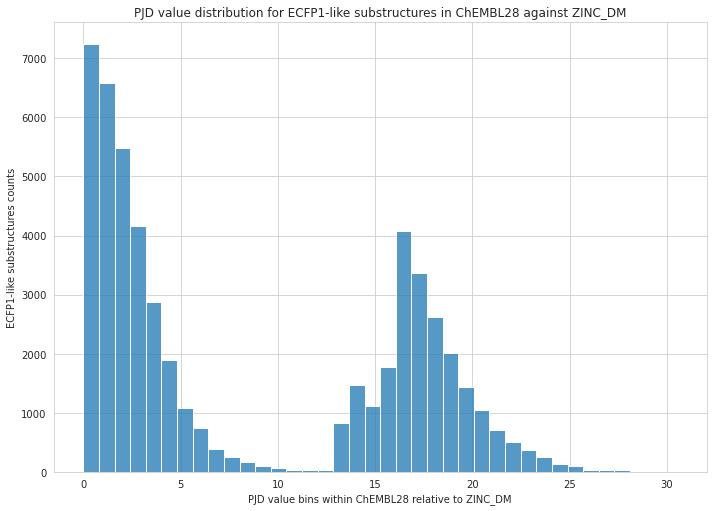

In [78]:
title = f"PJD value distribution for {FEATURES_NAME} in {DATASET_NAME} against {REFERENCE_DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(j.select_raw_interrelations()['value'])
ax.set(title=title, xlabel=f"PJD value bins within {DATASET_NAME} relative to {REFERENCE_DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [79]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(j.df.sort_values('value', ascending=False)[:100])

,,value
feature1,feature2,
CNO,NO,30.516543
C=N,cC(=N)N,29.193904
CO,OP,29.192762
O=P,cn(c)C,29.123433
CC(n)O,cN,29.023486
N=C(N)N,cc[nH],28.913042
CCS,N=C(N)N,28.875692
N=C(N)N,cc(c)[nH],28.468519
COC,OP,28.391938


In [80]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(j.df.sort_values('value', ascending=True)[:100])

,,value
feature1,feature2,
CC(C)N,cC(C)C,0.000150
CN(C)S,Cc(c)c,0.000164
CCc,cc(c)N,0.000175
COC,cC#N,0.000235
OCO,cc(c)s,0.000258
cC(C)=O,cOC,0.000271
C=CN,cc(c)c,0.000276
cN(c)c,cc(c)N,0.000578
C#N,c-c(n)n,0.000885
